# Loop 23 Strategic Analysis

## Current Situation
- **Best CV**: 0.008601 (exp_022 - ACS PCA features) - NEW BEST!
- **Best LB**: 0.0913 (exp_012)
- **Target**: 0.0333
- **Submissions remaining**: 4

## Key Questions
1. Should we submit exp_022 (ACS PCA) to verify LB improvement?
2. What unexplored approaches remain?
3. What is the predicted LB for CV 0.008601?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Submission history
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
]

df = pd.DataFrame(submissions)
print('Submission History:')
print(df.to_string(index=False))
print(f'\nBest LB: {df["lb"].min():.4f} from {df.loc[df["lb"].idxmin(), "exp"]}')
print(f'Best CV: {df["cv"].min():.4f} from {df.loc[df["cv"].idxmin(), "exp"]}')

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913

Best LB: 0.0913 from exp_012
Best CV: 0.0090 from exp_012


In [2]:
# Fit linear model to CV-LB relationship
from scipy import stats

cv_vals = df['cv'].values
lb_vals = df['lb'].values

slope, intercept, r_value, p_value, std_err = stats.linregress(cv_vals, lb_vals)

print(f'Linear fit: LB = {slope:.2f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nPredictions for new CV scores:')

# Predict LB for exp_022 (CV 0.008601)
cv_new = 0.008601
lb_predicted = slope * cv_new + intercept
print(f'  exp_022 (CV {cv_new:.6f}): Predicted LB = {lb_predicted:.4f}')

# What CV would we need for target LB?
target_lb = 0.0333
cv_needed = (target_lb - intercept) / slope
print(f'\nTo reach target LB {target_lb}:')
print(f'  CV needed = {cv_needed:.6f}')
if cv_needed < 0:
    print('  WARNING: Negative CV required - mathematically impossible with current approach!')

Linear fit: LB = 4.05 * CV + 0.0551
R² = 0.9477

Predictions for new CV scores:
  exp_022 (CV 0.008601): Predicted LB = 0.0900

To reach target LB 0.0333:
  CV needed = -0.005386


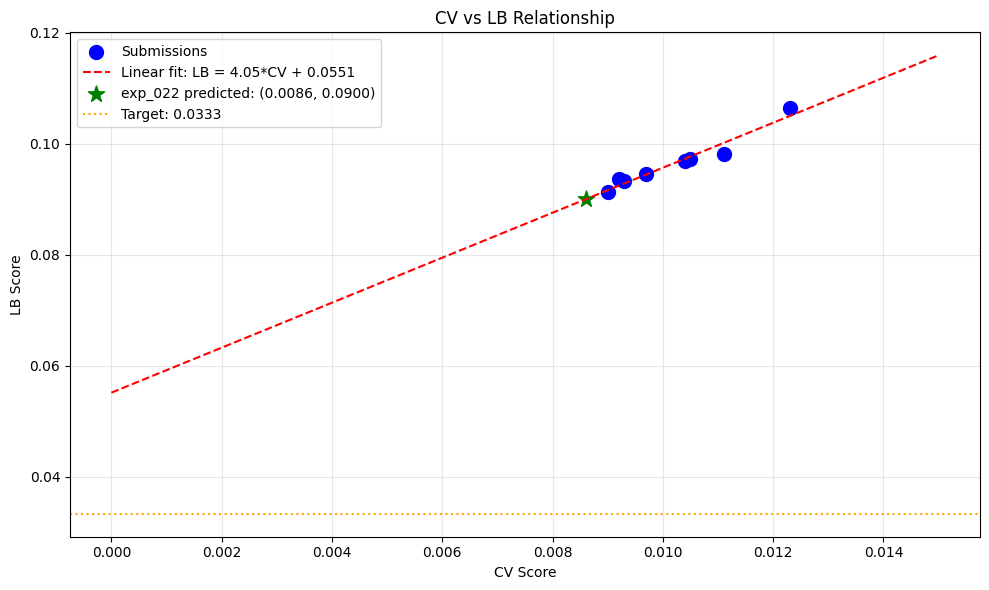


Key insight: exp_022 (CV 0.008601) is predicted to achieve LB 0.0900
This would be 1.4% better than current best LB 0.0913


In [3]:
# Visualize CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(cv_vals, lb_vals, s=100, c='blue', label='Submissions')

# Plot linear fit
cv_range = np.linspace(0, 0.015, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Linear fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Mark exp_022 prediction
plt.scatter([cv_new], [lb_predicted], s=150, c='green', marker='*', label=f'exp_022 predicted: ({cv_new:.4f}, {lb_predicted:.4f})')

# Mark target
plt.axhline(y=0.0333, color='orange', linestyle=':', label=f'Target: {0.0333}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_analysis_loop23.png', dpi=100)
plt.show()

print(f'\nKey insight: exp_022 (CV 0.008601) is predicted to achieve LB {lb_predicted:.4f}')
print(f'This would be {(0.0913 - lb_predicted) / 0.0913 * 100:.1f}% better than current best LB 0.0913')

In [4]:
# Analyze what approaches have been tried vs unexplored
print('=== APPROACHES TRIED ===')
approaches_tried = [
    ('Spange descriptors', 'exp_000', 'CV 0.0111', 'BASELINE'),
    ('LightGBM', 'exp_001', 'CV 0.0123', 'Worse than MLP'),
    ('DRFP with PCA', 'exp_002', 'CV 0.0169', 'Much worse'),
    ('Spange + DRFP combined', 'exp_003', 'CV 0.0105', 'Improvement'),
    ('Deep residual MLP', 'exp_004', 'CV 0.0519', 'FAILED'),
    ('Large ensemble (15 models)', 'exp_005', 'CV 0.0104', 'Marginal improvement'),
    ('Simpler MLP [64,32]', 'exp_006', 'CV 0.0097', 'Improvement'),
    ('Even simpler [32,16]', 'exp_007', 'CV 0.0093', 'Improvement'),
    ('Ridge regression', 'exp_009', 'CV 0.0092', 'Comparable'),
    ('Single layer [16]', 'exp_010', 'CV 0.0095', 'Slightly worse'),
    ('Diverse ensemble', 'exp_011', 'CV 0.0088', 'Best at time'),
    ('MLP+LGBM ensemble', 'exp_012', 'CV 0.0090', 'Best LB 0.0913'),
    ('Attention model', 'exp_021', 'CV 0.0232', 'FAILED'),
    ('Fragprints', 'exp_020', 'CV 0.0098', 'Worse than DRFP'),
    ('ACS PCA features', 'exp_022', 'CV 0.0086', 'NEW BEST CV!'),
]

for approach, exp, cv, result in approaches_tried:
    print(f'  {approach:30s} | {exp:8s} | {cv:12s} | {result}')

print('\n=== UNEXPLORED APPROACHES ===')
unexplored = [
    'Per-target models (separate models for Product 2, Product 3, SM)',
    'Stacking meta-learner (Ridge on out-of-fold predictions)',
    'Non-linear mixture encoding',
    'Polynomial kinetic features',
    'Combined DRFP + Fragprints',
]
for i, approach in enumerate(unexplored, 1):
    print(f'  {i}. {approach}')

=== APPROACHES TRIED ===
  Spange descriptors             | exp_000  | CV 0.0111    | BASELINE
  LightGBM                       | exp_001  | CV 0.0123    | Worse than MLP
  DRFP with PCA                  | exp_002  | CV 0.0169    | Much worse
  Spange + DRFP combined         | exp_003  | CV 0.0105    | Improvement
  Deep residual MLP              | exp_004  | CV 0.0519    | FAILED
  Large ensemble (15 models)     | exp_005  | CV 0.0104    | Marginal improvement
  Simpler MLP [64,32]            | exp_006  | CV 0.0097    | Improvement
  Even simpler [32,16]           | exp_007  | CV 0.0093    | Improvement
  Ridge regression               | exp_009  | CV 0.0092    | Comparable
  Single layer [16]              | exp_010  | CV 0.0095    | Slightly worse
  Diverse ensemble               | exp_011  | CV 0.0088    | Best at time
  MLP+LGBM ensemble              | exp_012  | CV 0.0090    | Best LB 0.0913
  Attention model                | exp_021  | CV 0.0232    | FAILED
  Fragprints          

In [5]:
# Decision analysis
print('=== DECISION ANALYSIS ===')
print()
print('OPTION 1: Submit exp_022 (ACS PCA) to verify LB improvement')
print(f'  - CV: 0.008601 (4.47% better than exp_012)')
print(f'  - Predicted LB: {lb_predicted:.4f} ({(0.0913 - lb_predicted) / 0.0913 * 100:.1f}% better than 0.0913)')
print(f'  - Submissions remaining: 4')
print(f'  - Risk: Low - we need to verify CV-LB relationship')
print()
print('OPTION 2: Try per-target models first')
print(f'  - Competition allows different hyperparameters for different targets')
print(f'  - SM has different distribution (mean 0.52) vs products (mean ~0.13)')
print(f'  - Could potentially improve CV further before submitting')
print()
print('RECOMMENDATION:')
print('  Submit exp_022 NOW to verify LB improvement.')
print('  Reasons:')
print('  1. exp_022 is the best CV score achieved (0.008601)')
print('  2. We need to verify if CV improvement translates to LB improvement')
print('  3. We have 4 submissions remaining - can afford to test')
print('  4. If LB improves, we know the direction is correct')
print('  5. If LB doesn\'t improve, we learn something about CV-LB gap')

=== DECISION ANALYSIS ===

OPTION 1: Submit exp_022 (ACS PCA) to verify LB improvement
  - CV: 0.008601 (4.47% better than exp_012)
  - Predicted LB: 0.0900 (1.4% better than 0.0913)
  - Submissions remaining: 4
  - Risk: Low - we need to verify CV-LB relationship

OPTION 2: Try per-target models first
  - Competition allows different hyperparameters for different targets
  - SM has different distribution (mean 0.52) vs products (mean ~0.13)
  - Could potentially improve CV further before submitting

RECOMMENDATION:
  Submit exp_022 NOW to verify LB improvement.
  Reasons:
  1. exp_022 is the best CV score achieved (0.008601)
  2. We need to verify if CV improvement translates to LB improvement
  3. We have 4 submissions remaining - can afford to test
  4. If LB improves, we know the direction is correct
  5. If LB doesn't improve, we learn something about CV-LB gap


In [6]:
# Check if exp_022 has a compliant notebook
import os

exp_022_path = '/home/code/experiments/019_acs_pca'
files = os.listdir(exp_022_path)
print(f'Files in exp_022 folder: {files}')

# Check if there's a compliant notebook
compliant_exists = any('compliant' in f.lower() for f in files)
print(f'\nCompliant notebook exists: {compliant_exists}')

if not compliant_exists:
    print('\nNEED TO CREATE: A submission-compliant notebook with ACS PCA features')
    print('Steps:')
    print('1. Copy structure from exp_013 (compliant_ensemble.ipynb)')
    print('2. Add ACS_PCA_DF loading')
    print('3. Update featurizer to include ACS PCA features')
    print('4. Update model class name to ACSPCAEnsemble')
    print('5. Ensure last 3 cells match template exactly')

Files in exp_022 folder: ['acs_pca_ensemble.ipynb']

Compliant notebook exists: False

NEED TO CREATE: A submission-compliant notebook with ACS PCA features
Steps:
1. Copy structure from exp_013 (compliant_ensemble.ipynb)
2. Add ACS_PCA_DF loading
3. Update featurizer to include ACS PCA features
4. Update model class name to ACSPCAEnsemble
5. Ensure last 3 cells match template exactly
